In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
data = pd.read_csv('data-csv/chs2018_public.csv')

In [89]:
len(data.columns)

149

In [90]:
len(data)

10076

In [91]:
data = data[['daysalc30', 'hrssleepcat_q1', 'imputed_PA08_3R_q1', 'fruitveg18', 'mood55']]

In [92]:
data.columns = ['alcohol', 'sleep', 'exercise', 'nutrition', 'mood']

In [62]:
data = data.dropna()

In [63]:
len(data)

4672

In [75]:
(data['mood'] == 1).sum() # answered not at all 

2444

In [76]:
(data['mood'] == 2).sum() # answered several days

1370

In [77]:
(data['mood'] == 3).sum() # answered more than half of the days

331

In [78]:
(data['mood'] == 4).sum() # answered nearly every day

527

In [83]:
(data['mood'] == '.d').sum() # answered that they didn't remember

0

In [84]:
(data['mood'] == '.r').sum() # refused to answer

0

In [8]:
train, test = train_test_split(data, test_size = 0.2)

In [9]:
train.head()

,alcohol,sleep,exercise,nutrition,mood
5799,0.0,2.0,3.0,2.0,1.0
6655,10.0,2.0,3.0,3.0,1.0
6100,1.0,2.0,3.0,2.0,1.0
3327,0.0,2.0,3.0,2.0,1.0
7822,8.6,2.0,3.0,3.0,2.0


In [41]:
train_x = train.iloc[:, 0:4]
train_y = train.iloc[:, 4]

In [42]:
train_x.head()

,alcohol,sleep,exercise,nutrition
5799,0.0,2.0,3.0,2.0
6655,10.0,2.0,3.0,3.0
6100,1.0,2.0,3.0,2.0
3327,0.0,2.0,3.0,2.0
7822,8.6,2.0,3.0,3.0


In [43]:
test_x = test.iloc[:, 0:4]
test_y = test.iloc[:, 4]

In [44]:
from sklearn.linear_model import BayesianRidge
BayesianRidge = BayesianRidge(compute_score = True)
BayesianRidge.fit(train_x, train_y)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=True, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [45]:
BayesianRidge_pred_y = BayesianRidge.predict(test_x)

In [46]:
BayesianRidge_RMSE = sqrt(mean_squared_error(test_y, BayesianRidge_pred_y))
BayesianRidge_RMSE

0.9736143463359318

In [50]:
from sklearn.ensemble import RandomForestRegressor
RandomForest = RandomForestRegressor()
RandomForest.fit(train_x, train_y)

C:\Users\pishi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [51]:
RandomForest_pred_y = RandomForest.predict(test_x)

In [52]:
RandomForest_RMSE = sqrt(mean_squared_error(test_y, RandomForest_pred_y))
RandomForest_RMSE

1.020250838395252

In [53]:
from sklearn.linear_model import LinearRegression
LinearRegression = LinearRegression()
LinearRegression.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
LinearRegression_pred_y = LinearRegression.predict(test_x)

In [55]:
LinearRegression_RMSE = sqrt(mean_squared_error(test_y, LinearRegression_pred_y))
LinearRegression_RMSE

0.9737119539040656

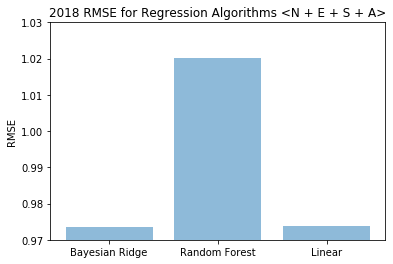

In [56]:
import numpy as np
import matplotlib.pyplot as plt
models = ('Bayesian Ridge', 'Random Forest', 'Linear')
y_pos = np.arange(len(models))
rmse = [BayesianRidge_RMSE, RandomForest_RMSE, LinearRegression_RMSE]

plt.bar(y_pos, rmse, align = 'center', alpha = 0.5)
plt.xticks(y_pos, models)
plt.ylabel('RMSE')
plt.title('2018 RMSE for Regression Algorithms <N + E + S + A>')
plt.ylim(0.97, 1.03)

plt.show()